## Netflix Movies and TV shows

Analysing the [Kaggle Dataset](https://www.kaggle.com/shivamb/netflix-shows) with information about Netflix Movies and TV shows.

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [5]:
file = "data/netflix_titles.csv"
netflix_df = pd.read_csv(file, ",")
netflix_df.head(3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [6]:
netflix_df.shape

(6234, 12)

In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
netflix_df['date_Added']=pd.to_datetime(netflix_df['date_added'])

In [10]:
netflix_df.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
date_Added      datetime64[ns]
dtype: object

In [11]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_Added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019-09-09
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016-09-09
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018-09-08


# Netflix movies

In [12]:
netflix_movies_df=netflix_df
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.split(" ")
netflix_movies_df['duration'] = netflix_movies_df['duration'].str[0].astype(int)
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_Added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019-09-09
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016-09-09
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",2018-09-08
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,2018-09-08
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08


In [13]:
netflix_movies_df.dropna(inplace=True, subset=["director"])
netflix_movies_df_Sorted=netflix_movies_df.sort_values(by=['director'],ascending=[False])


In [14]:
netflix_movies_by_director = netflix_movies_df.groupby(netflix_movies_df["director"]).count()['title']
netflix_movies_by_director = netflix_movies_by_director.sort_values(ascending=False)
netflix_movies_by_director

director
Raúl Campos, Jan Suter        18
Marcus Raboy                  14
Jay Karas                     13
Jay Chapman                   12
Steven Spielberg               9
                              ..
John Michael McDonagh          1
John Mikulak, Joshua Brown     1
John Milius                    1
John Murlowski                 1
Kevin Phillips                 1
Name: title, Length: 3301, dtype: int64

<AxesSubplot:xlabel='director'>

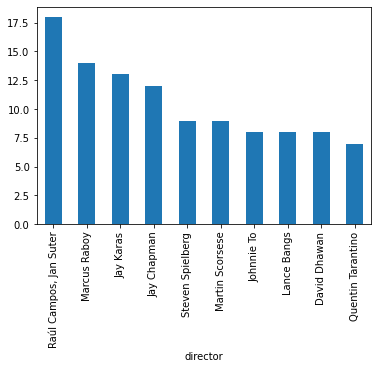

In [15]:
plot = netflix_movies_by_director.head(10).plot(kind='bar')
plot

In [16]:
conditions = np.logical_and(netflix_df["country"] == "United States", netflix_df["listed_in"].str.contains('Comedies'))
american_netflix_comedies = netflix_df[conditions].copy()
american_netflix_comedies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_Added
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,2017-09-08
31,80239639,Movie,Sierra Burgess Is A Loser,Ian Samuels,"Shannon Purser, Kristine Froseth, RJ Cyler, No...",United States,"September 7, 2018",2018,PG-13,106,"Comedies, Romantic Movies",A wrong-number text sparks a virtual romance b...,2018-09-07
40,80058026,Movie,Hell and Back,"Tom Gianas, Ross R. Shuman","Nick Swardson, Mila Kunis, Bob Odenkirk, T.J. ...",United States,"September 6, 2018",2015,R,86,"Action & Adventure, Comedies, Independent Movies","When best friends break a blood oath, one of t...",2018-09-06
52,80147760,Movie,Carrie Pilby,Susan Johnson,"Bel Powley, Nathan Lane, Vanessa Bayer, Gabrie...",United States,"September 5, 2017",2016,TV-14,98,"Comedies, Dramas",A socially awkward 19-year-old genius makes bi...,2017-09-05


In [17]:
netflix_cast_df = netflix_df.copy()
netflix_cast_df.dropna(inplace=True, subset=['cast'])
emma_daniel_conditions = np.logical_or(netflix_cast_df["cast"].str.contains('Emma Watson'), netflix_cast_df["cast"].str.contains('Daniel Radcliffe'))
daniel_or_emma_shows = netflix_cast_df[emma_daniel_conditions].copy()
daniel_or_emma_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_Added
1617,70202150,Movie,My Week with Marilyn,Simon Curtis,"Michelle Williams, Kenneth Branagh, Eddie Redm...","United Kingdom, United States","May 30, 2019",2011,R,99,"Dramas, Romantic Movies","While filming a movie in England, Hollywood ic...",2019-05-30
2983,80081277,Movie,Colonia,Florian Gallenberger,"Emma Watson, Daniel Brühl, Michael Nyqvist, Ri...","Germany, France, Luxembourg, United Kingdom, U...","July 14, 2018",2015,R,110,"Dramas, Independent Movies, International Movies",When her boyfriend is caught up in a Chilean c...,2018-07-14
3241,80097389,Movie,Swiss Army Man,"Dan Kwan, Daniel Scheinert","Paul Dano, Daniel Radcliffe, Mary Elizabeth Wi...","United States, Sweden","January 30, 2019",2016,R,97,"Comedies, Dramas, Independent Movies",A washed-up corpse with surprising abilities g...,2019-01-30
3337,70271454,Movie,The Bling Ring,Sofia Coppola,"Emma Watson, Leslie Mann, Carlos Miranda, Isra...","United States, United Kingdom, France, Germany...","January 18, 2020",2013,R,91,"Dramas, Independent Movies","Based on fact, this comic thriller tracks the ...",2020-01-18
5062,70266677,Movie,Horns,Alexandre Aja,"Daniel Radcliffe, Juno Temple, Max Minghella, ...","United States, Canada","August 1, 2019",2013,R,120,"Dramas, Horror Movies, Sci-Fi & Fantasy","Accused of murder, Ig Perish wakes up one day ...",2019-08-01
